<a href="https://colab.research.google.com/github/JunSeokCheon/eCommerce_weblog_analysis/blob/master/eCommerce_weblog_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - 이번 프로젝트는 kaggle에서 제공하는 데이터셋인 eCommerce 웹 로그 데이터 분석 프로젝트이다.
### 1. 데이터 전처리
### 2. 데이터 분석 & 시각화

#### 해당 파일은 데이터 전처리 과정이다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/ecommerce_log_analysis

/content/drive/MyDrive/ecommerce_log_analysis


In [3]:
ls

2019-Nov.csv     ecommerce-behavior-data-from-multi-category-store.zip
2019-Oct.csv     eCommerce_weblog_preprocessing.ipynb
data_load.ipynb  kaggle.json


## 데이터 load & import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline

In [5]:
ecommerce_df = pd.read_csv("2019-Oct.csv")

In [6]:
temp_data = ecommerce_df

#### 4200만개 데이터와 9개의 컬럼(event_time, event_type, product_id, category_id, category_code, brand, price, user_id, user_session)으로 구성되어 있다.
#### 결측값(NaN)과 텍스트 통일 등 여러 가지 전처리를 확인하자.
#### 컬럼들에 대한 데이터 타입을 보면 event_time에 대한 처리가 필요할 것으로 보인다.

In [7]:
ecommerce_df.shape

(42448764, 9)

In [8]:
ecommerce_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [9]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


## 각 컬럼들을 상세히 알아보기 전에 데이터 수가 많기 때문에 결측값(NaN)이 있는 데이터는 삭제하자.

In [10]:
aft_ecommerce_df = ecommerce_df.dropna().reset_index(drop=True)

In [11]:
aft_ecommerce_df.shape

(26560620, 9)

## event_time

#### 데이터의 time은 2019년 10월 데이터이다.
#### 데이터의 timezone이 UTC 기준이므로 KST로 변경하자. (KST는 UTC보다 9시간 빠르다)

In [12]:
print(aft_ecommerce_df['event_time'].min())
print(aft_ecommerce_df['event_time'].max())

2019-10-01 00:00:00 UTC
2019-10-31 23:59:59 UTC


In [13]:
aft_ecommerce_df['event_time'].head()

0    2019-10-01 00:00:00 UTC
1    2019-10-01 00:00:01 UTC
2    2019-10-01 00:00:04 UTC
3    2019-10-01 00:00:05 UTC
4    2019-10-01 00:00:10 UTC
Name: event_time, dtype: object

#### UTC -> KST 변경 방법 
1. event_time에서 UTC 문자열을 제외한 date 데이터만 추출해서 리스트에 저장한다. 
2. convert_kst 함수에서 9시간을 더해서 utc -> kst로 변환한다.
3. 새로운 컬럼(kst_time)을 만들어서 변환한 데이터를 추가한다.
4. 필요없어진 event_time을 삭제한다.
5. kst_time의 데이터 타입을 datetime으로 변환한다. 

In [14]:
utc_list = []
for date in aft_ecommerce_df['event_time']:
  utc_list.append(date[:19])

In [15]:
utc_list[:10]

['2019-10-01 00:00:00',
 '2019-10-01 00:00:01',
 '2019-10-01 00:00:04',
 '2019-10-01 00:00:05',
 '2019-10-01 00:00:10',
 '2019-10-01 00:00:11',
 '2019-10-01 00:00:11',
 '2019-10-01 00:00:11',
 '2019-10-01 00:00:13',
 '2019-10-01 00:00:16']

In [16]:
def convert_kst(utc_string):
  utc_dt = datetime.strptime(utc_string, '%Y-%m-%d %H:%M:%S')
  kst_dt = utc_dt + timedelta(hours=9)
  str_datetime = kst_dt.strftime('%Y-%m-%d %H:%M:%S')

  return str_datetime

In [17]:
kst_list = []
for utc in utc_list:
  kst_list.append(convert_kst(utc))

In [18]:
kst_list[:10]

['2019-10-01 09:00:00',
 '2019-10-01 09:00:01',
 '2019-10-01 09:00:04',
 '2019-10-01 09:00:05',
 '2019-10-01 09:00:10',
 '2019-10-01 09:00:11',
 '2019-10-01 09:00:11',
 '2019-10-01 09:00:11',
 '2019-10-01 09:00:13',
 '2019-10-01 09:00:16']

In [19]:
len(kst_list)

26560620

In [20]:
aft_ecommerce_df['kst_time'] = pd.DataFrame(kst_list)

In [21]:
aft_ecommerce_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
0,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 09:00:00
1,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 09:00:01
2,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 09:00:04
3,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01 09:00:05
4,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01 09:00:10


In [22]:
aft_ecommerce_df = aft_ecommerce_df.drop(['event_time'], axis = 1)
aft_ecommerce_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 09:00:00
1,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 09:00:01
2,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 09:00:04
3,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01 09:00:05
4,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01 09:00:10


In [23]:
aft_ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26560620 entries, 0 to 26560619
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_type     object 
 1   product_id     int64  
 2   category_id    int64  
 3   category_code  object 
 4   brand          object 
 5   price          float64
 6   user_id        int64  
 7   user_session   object 
 8   kst_time       object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ GB


In [24]:
aft_ecommerce_df['kst_time'] = pd.to_datetime(aft_ecommerce_df['kst_time'])
aft_ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26560620 entries, 0 to 26560619
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_type     object        
 1   product_id     int64         
 2   category_id    int64         
 3   category_code  object        
 4   brand          object        
 5   price          float64       
 6   user_id        int64         
 7   user_session   object        
 8   kst_time       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.8+ GB


In [25]:
aft_ecommerce_df['kst_time']

0          2019-10-01 09:00:00
1          2019-10-01 09:00:01
2          2019-10-01 09:00:04
3          2019-10-01 09:00:05
4          2019-10-01 09:00:10
                   ...        
26560615   2019-11-01 08:59:58
26560616   2019-11-01 08:59:58
26560617   2019-11-01 08:59:58
26560618   2019-11-01 08:59:58
26560619   2019-11-01 08:59:59
Name: kst_time, Length: 26560620, dtype: datetime64[ns]

## event_type

#### event_type에는 view, purchase, cart가 존재하며, 비율은 view가 압도적으로 높다.
#### 시각화하여 표현하면 아래와 같다.

In [26]:
aft_ecommerce_df['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [27]:
aft_ecommerce_df['event_type'].value_counts()

view        25201706
cart          809407
purchase      549507
Name: event_type, dtype: int64

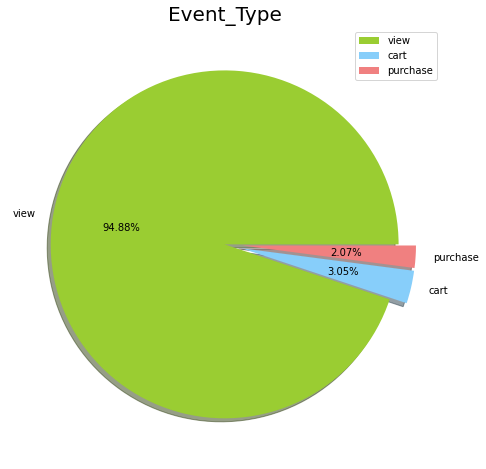

In [28]:
labels = ['view', 'cart','purchase']
size = aft_ecommerce_df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## product_id, categort_id, category_code, user_id, user_session

#### product_id, category_id, category_code, brand는 같은 양상을 보이지만 price는 같은 제품이라도 날짜에 따른 가격 차이가 존재한다. 
#### user_id, user_session은 같은 양상을 보이는 경우도 있고, user_id가 같더라도 user_session이 다른 경우도 있다.

In [29]:
aft_ecommerce_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 09:00:00
1,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 09:00:01
2,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 09:00:04
3,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01 09:00:05
4,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01 09:00:10


In [30]:
aft_ecommerce_df[aft_ecommerce_df['product_id'] == 3900821]

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 09:00:00
20869,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,512448158,52a857d6-b4db-42cb-bf03-b0b66cd36c72,2019-10-01 12:12:34
21190,purchase,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,512448158,52a857d6-b4db-42cb-bf03-b0b66cd36c72,2019-10-01 12:13:12
27147,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,541410551,50b74e0f-83a4-4114-aaaf-e083225665f6,2019-10-01 12:24:58
28337,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,541410551,50b74e0f-83a4-4114-aaaf-e083225665f6,2019-10-01 12:27:28
...,...,...,...,...,...,...,...,...,...
26503659,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,30.61,565887381,2f7cdf20-52c4-4a40-b6c4-e0c2868d1528,2019-11-01 03:59:18
26504523,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,30.61,565887381,2f7cdf20-52c4-4a40-b6c4-e0c2868d1528,2019-11-01 04:00:46
26540925,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,30.61,555818740,b7799e97-16fb-41cd-90bd-3bde6fc2bcb9,2019-11-01 05:51:51
26547737,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,30.61,542353553,bb42affc-1863-4009-bcc9-bd8ba92fa30a,2019-11-01 06:30:20


In [50]:
print("product_id의 고유 값 개수 : ", len(aft_ecommerce_df['product_id'].unique()))
print("category_id의 고유 값 개수 : ", len(aft_ecommerce_df['category_id'].unique()))
print("category_code의 고유 값 개수 : ", len(aft_ecommerce_df['category_code'].unique()))
print("user_id의 고유 값 개수 : ", len(aft_ecommerce_df['user_id'].unique()))
print("user_session의 고유 값 개수 : ", len(aft_ecommerce_df['user_session'].unique()))

product_id의 고유 값 개수 :  60371
category_id의 고유 값 개수 :  248
category_code의 고유 값 개수 :  126
user_id의 고유 값 개수 :  2323036
user_session의 고유 값 개수 :  6419693


## brand

#### 많은 수의 브랜드가 존재하고, event_type이 purchase인 데이터를 보면 제품의 브랜드에 따른 판매량을 볼 수 있다.

In [51]:
print("brand 고유 값 개수 : ", len(aft_ecommerce_df['brand'].unique()))

brand 고유 값 개수 :  1731


In [53]:
purchase = aft_ecommerce_df.loc[aft_ecommerce_df['event_type'] == "purchase"]
purchase.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
111,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2019-10-01 09:02:14
197,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01 09:04:37
268,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,2019-10-01 09:07:07
339,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,2019-10-01 09:09:26
352,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01 09:09:54


#### 판매량 순위를 보면 아래와 같고, 그래프로 top 5 brand를 표현하면 samsung, apple, xiaomi, huawei, oppo 로 나타난다.

In [55]:
top_sell_brand = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sell_brand.head(10)

,count
brand,
samsung,171706
apple,142577
xiaomi,46595
huawei,23294
oppo,10891
lg,7831
acer,6882
elenberg,5435
indesit,5023


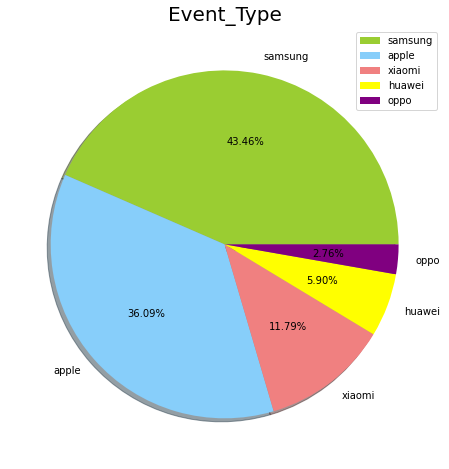

In [87]:
labels = top_sell_brand.index[:5]
size = top_sell_brand['count'].tolist()[:5]
colors = ['yellowgreen', 'lightskyblue','lightcoral','yellow','purple']

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## price

#### 가격은 0.88달러부터 2574달러까지 다양하게 분포되어 있다.
#### 최소 가격 제품은 ritmix사의 헤드폰이고, 최대 가격 제품은 rado사의 시계이다.

In [56]:
print("price 고유 값 개수 : ", len(aft_ecommerce_df['price'].unique()))

price 고유 값 개수 :  50795


In [64]:
aft_ecommerce_df['price'].unique()

array([  33.2 ,  251.74, 1081.98, ..., 1693.42, 1604.37,  120.78])

In [57]:
print("최소 price : ", aft_ecommerce_df['price'].min())
print("최대 price : ", aft_ecommerce_df['price'].max())

최소 price :  0.88
최대 price :  2574.07


In [60]:
aft_ecommerce_df[aft_ecommerce_df['price'] == 0.88][:3]

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
2328,view,4804536,2053013554658804075,electronics.audio.headphone,ritmix,0.88,514127317,abb0d5da-9acb-4714-a4fa-cd514f585739,2019-10-01 11:25:11
2471,view,4804536,2053013554658804075,electronics.audio.headphone,ritmix,0.88,514127317,abb0d5da-9acb-4714-a4fa-cd514f585739,2019-10-01 11:25:40
2603,purchase,4804536,2053013554658804075,electronics.audio.headphone,ritmix,0.88,514127317,abb0d5da-9acb-4714-a4fa-cd514f585739,2019-10-01 11:26:05


In [61]:
aft_ecommerce_df[aft_ecommerce_df['price'] == 2574.07][:3]

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
2702,view,21407288,2053013561579406073,electronics.clocks,rado,2574.07,527321544,b25dd047-7fec-489d-8b6b-a165cf1c7490,2019-10-01 11:26:24
21361,view,21407287,2053013561579406073,electronics.clocks,rado,2574.07,545771154,3316840f-8196-487c-a694-1b9b4c147a7d,2019-10-01 12:13:33
40593,view,21407287,2053013561579406073,electronics.clocks,rado,2574.07,514166081,5ec254bf-4457-48bf-8a5c-d1ad25284e97,2019-10-01 12:50:50


## 데이터 저장

In [88]:
aft_ecommerce_df.to_csv('refined_2019_Oct.csv')